# Post-Processing
All parameters, which can/should be changed are described in the corresponding cell.

## Load Packages

In [1]:
%matplotlib notebook
import util

## Load data

In [7]:
# Initialize postprocessing
analyse = util.PostProcessor()
# Load data
# poisson_noise... spectra corrupted by poisson noise
analyse.load_data(poisson_noise = True)

Loaded SI from //129.27.204.202/images_titan/Michael/18112022/SI-006/EELS Spectrum Image.dm4
Loaded reference image from //129.27.204.202/images_titan/Michael/18112022/SI-006/FEI HAADF Image.dm4


## Align spectra (optional)

Decomposition info:
  normalize_poissonian_noise=True
  algorithm=SVD
  output_dimension=None
  centre=None


<IPython.core.display.Javascript object>


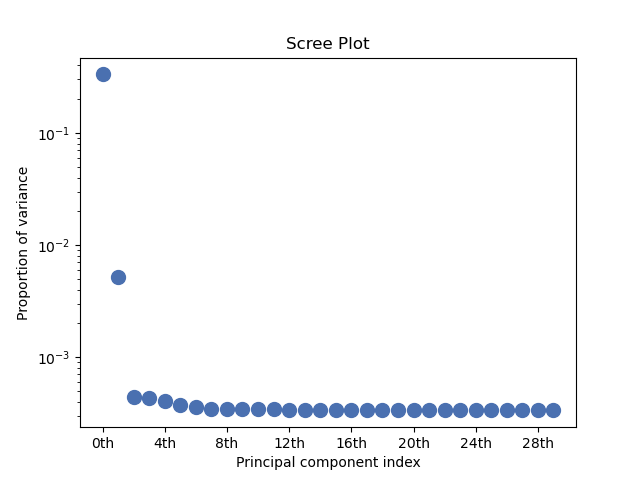

<IPython.core.display.Javascript object>


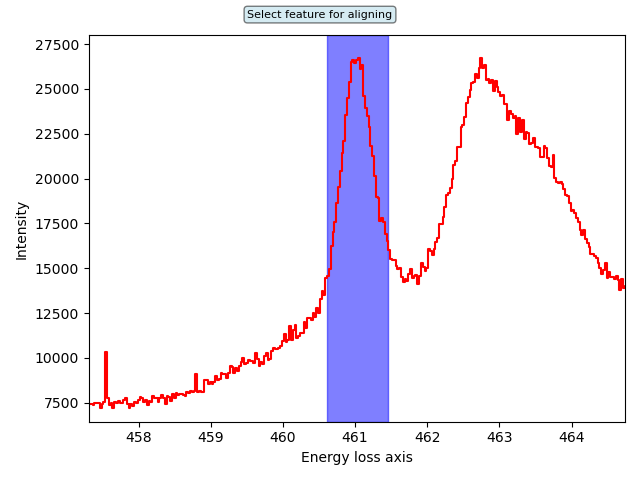

In [8]:
# Select feature for cross correlation (sharp peak)
analyse.align_spectra_init()

With sliders different pixels of the spectrum image can be observed.


<IPython.core.display.Javascript object>


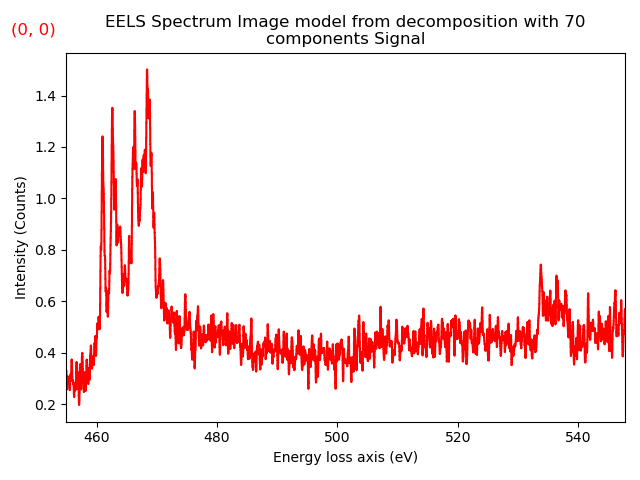

In [12]:
# Plot PCA-denoised and smoothed spectra, which are only used for aligning
# n... Number of components for reconstructing the spectra used for cross correlation
# sigma... Gaussian blurr
s_denoised = analyse.plot_aligning(n=70, sigma = 2)

  0%|          | 0/24552 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


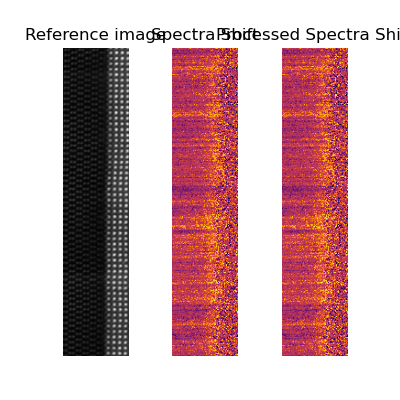

In [16]:
# max_shift... maximum shift of the spectra
# sigma... blurr of the shift (only in scanning direction)
# vmin, vmax... contrast for spectra shift plot
shifts = analyse.align_spectra_calc(s_denoised, max_shift = 0.2,  sigma = [0, 1], vmin = -0.2, vmax = 0.2)

  0%|          | 0/341 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


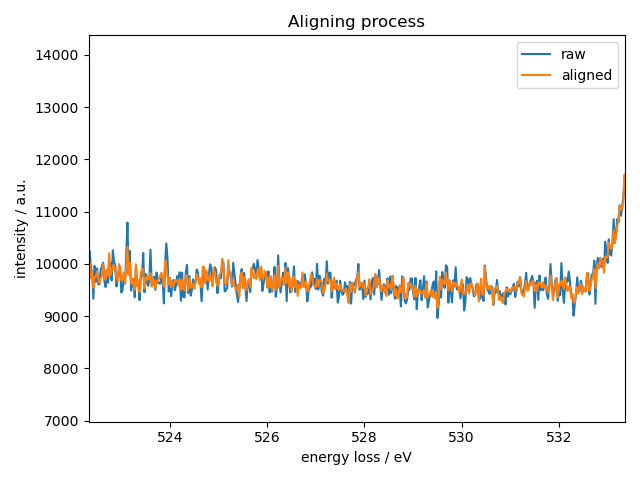

In [17]:
# max_shift.. maximum shift of the spectra
analyse.align_spectra_apply(shifts)

In [ ]:
# Save current figure (latest open figure)
#analyse.save_fig(name = 'Spectra_Aligning')

## Crop spectra

<IPython.core.display.Javascript object>


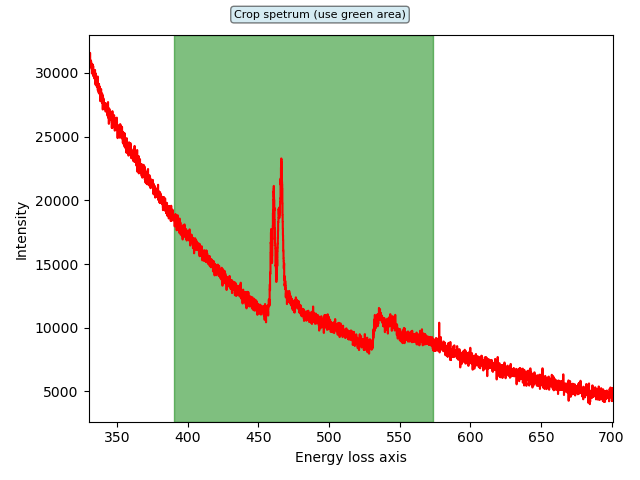

In [3]:
# Select cropping range for EELS 
analyse.select_crop()

In [5]:
# Crop EELS
analyse.crop()

Crop Region from 390.40 eV to 574.00 eV


## Clustering
algorithm from _'Dimensionality reduction and unsupervised clustering for EELS-SI'_

[https://doi.org/10.1016/j.ultramic.2021.113314](https://doi.org/10.1016/j.ultramic.2021.113314)

Decomposition info:
  normalize_poissonian_noise=True
  algorithm=SVD
  output_dimension=None
  centre=None


<IPython.core.display.Javascript object>


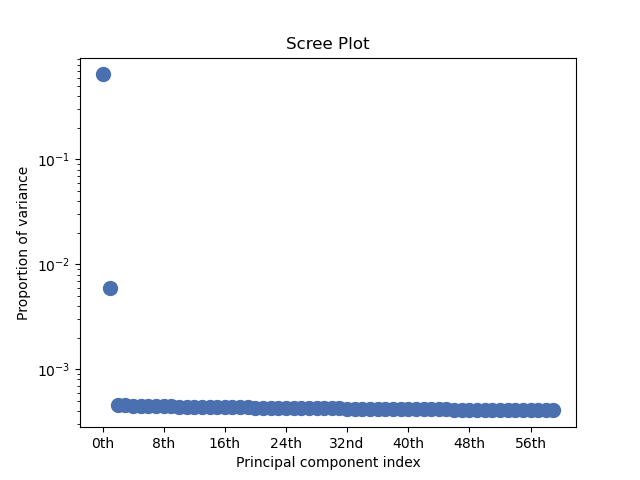

In [6]:
# Initialize clustering (PCA decomposition)
# n_plot... maximum number of components in the scree plot
analyse.cluster_pca(n_plot = 60)

<IPython.core.display.Javascript object>


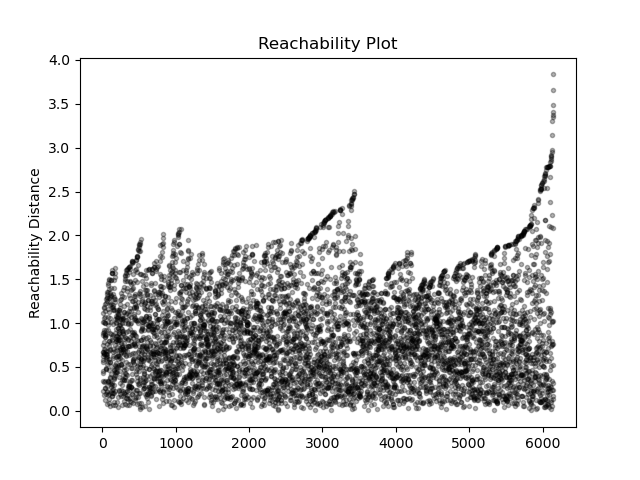

In [7]:
# Dimension reduction with t-SNE
# n_denoise_cluster... number of components for denoising used for clustering-algorithm
# perplexity_tsne... t-SNE - related to the number of nearest neighbors that is used in other manifold learning algorithms (between 5 to 50)
analyse.clustering_init(n_denoise_cluster = 10, perplexity_tsne = 30)

<IPython.core.display.Javascript object>


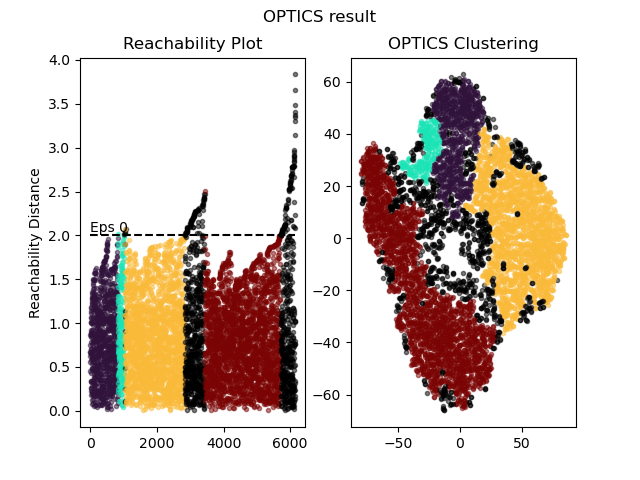

<IPython.core.display.Javascript object>


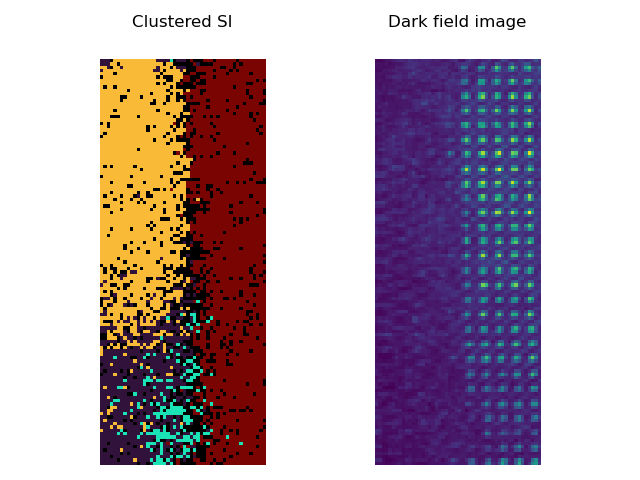

In [8]:
# OPTICS clustering
# eps_optics... estimate from reacability plot for clustering
# n_split... Split reachability for different eps. (len(n_split) + 1 eps have to be given)
# k_min... minimum points of same cluster, otherwise it will be ignored
#analyse.clustering(eps_optics = [1], cmap = 'gist_ncar') # --> better for continuous labeling
analyse.clustering(eps_optics = [2], n_split = [], cmap = 'turbo', k_min = 200) # --> better for discrete labeling and spectra averging

In [9]:
# Save current figure (latest open figure)
#analyse.save_fig(name = 'Clustering',size = (9, 9))

Number of clusters for plotting: 4


<IPython.core.display.Javascript object>


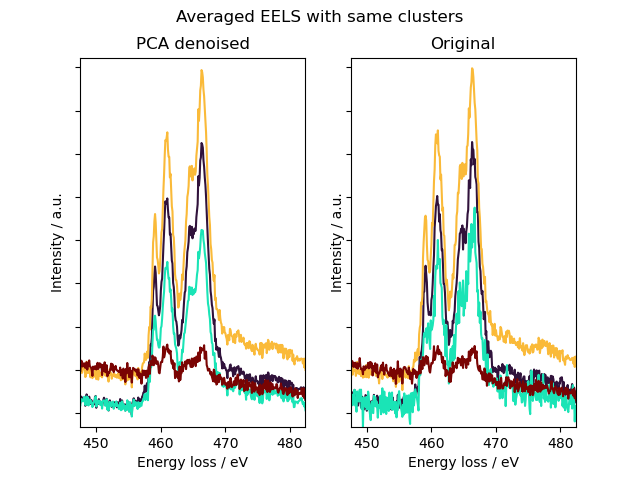

In [10]:
# Average spectra of same cluster
# k_min... minimum number of points of the same cluster (if None, same number as at clustering is used)
analyse.clustering_spectra(k_min = None)

## Find atom positions
using _Atomap_.

[https://doi.org/10.1186/s40679-017-0042-5](https://doi.org/10.1186/s40679-017-0042-5)

In [ ]:
# Determine atom positions
# s_low... minimum distance between atoms in pixel
analyse.atom_positioning(s_low = 2)

# Remove atoms
Selector = util.atom_selector(analyse.atom_positions, analyse.s_darkfield.data, map_label = False)

In [ ]:
# Add/Remove single atoms - close figure after finishing selecting
analyse.atom_positions = Selector.atom_positions
analyse.atom_positioning_single(analyse.s_darkfield.data, analyse.atom_positions, stacking = False)

In [ ]:
# Refine atom positions
analyse.refine_positions()

# Drift Correction

In [ ]:
# Calculate laticce vectors
analyse.lattice_calc()

In [ ]:
# Drift correction
# vector_ind... select index from lattice above, which should match the x_crystal and y_crystal vectors
# crystal_x... selected vector (vector_ind[0]) is shifted to crystal_x
# crystal_y... selected vector (vector_ind[1]) is shifted to crystal_y
analyse.drift_correction(vector_ind = [0, 1], crystal_x = [1,0], crystal_y = [0,1], scaling = True)

## Stacking & Aligning
Aligning by the _SmartAlign_ algorithm.

[https://doi.org/10.1186/s40679-015-0008-4](https://doi.org/10.1186/s40679-015-0008-4)

In [ ]:
# Choose atoms for stacking
# drift_corr... use drift corrected images or raw images
analyse.drift_on_off(drift_corr = False)
Selector = util.atom_selector(analyse.atom_position_stacking, analyse.darkfield_stacking, analyse.labels_shaped_stacking, analyse.newcmp, map_label = True)

In [ ]:
# Add/Remove single atoms for stacking - close figure after finishing selecting
analyse.atom_position_stacking = Selector.atom_positions
analyse.atom_positioning_single(analyse.darkfield_stacking, analyse.atom_position_stacking)

In [ ]:
# Crop cells and stack them
# width... width of the cells in pixels
# height... height of the cells in pixels
# shift_x... shifting all points in x-direction
# shift_y... shifting all points in y-direction
analyse.stacking(width = 40, height = 25, shift_x =-14, shift_y = 2)

In [ ]:
# Save current figure (latest open figure)
#analyse.save_fig(name = 'Stacking')

In [ ]:
# Alinging according SmartAlign algorithm
# i_rigid... Iterations for rigid alignment
# max_shift... Maximum rigid shift (finds maximum correlation within these limits)
# i_non_rigid_it... Iterations of non-rigid alignment (if blurry images, set to 0)
# i_non_rigid_max... Iteration of non-rigid alignment for each cell
# row... Lock distortion field ('fitted'... linear fit of distortion, 'locked'... constant fit of distortion field)

aligner = util.Aligner(analyse.dark_field_stack)

aligner.rigid_align(i_rigid = 1, max_shift = (4, 4))
aligner.non_rigid_align(i_non_rigid_it = 0, i_non_rigid_max = 500, row = 'locked')

aligner.plot_aligned()

## L2-norm

In [ ]:
# Calculate L2-norm
# norming... Norming function for each cell ('max'... divide by cell maximum, 'mean'... divide by cell mean, 'kernel'... gaussian smoothing)
# exponent... Using other norms as L2
analyse.darkfield_aligned = aligner.image_align
darkfield_aligned_norm = analyse.L2_init(norming = 'mean', exponent = 2)
util.L2_Selector(darkfield_aligned_norm, analyse.L2_norm)

In [ ]:
# Keep percentage of best slices
# n_ratio... Percentage of cells which should be kept (if None --> take calulated limit)
# norming... Use same norming function as above
# exponent... Use same exponent as above
analyse.L2_norm_process(n_ratio = 1, norming = 'mean', exponent = 2)

In [ ]:
# Save current figure (latest open figure)
#analyse.save_fig(name = 'Aligned')

In [ ]:
# Align EELS-signal
analyse.EELS_sum_aligned = aligner.align_second(analyse.EELS, analyse.index_image_stack, analyse.slice_L2_excluded)

## Fine structure mapping

In [ ]:
# Determine background and signal
analyse.EELS_region()

In [ ]:
# Plot background and signal
# background_fun... Background function ('PowerLaw' or 'Exponential')
# signal_plot... Plot only signal (otherwise: averaged, background, initial fit, fit)
analyse.EELS_background(background_fit = 'Powerlaw', signal_plot = False)

In [ ]:
# Interactive estimation of PCA-components
# background_fit... background fit function
# fast.. fast background removal
selector_pca = util.Selector_pca(analyse, background_fit = 'Power law', fast = True)

In [ ]:
# Save current figure (latest open figure)
#analyse.save_fig(name = 'PCA_denoising', size = (10,10))

In [ ]:
# Save denoised EELS spectrum with selected number of components for investigation in GMS (import rpl)
# pca_denoised... Save PCA-denoised spectrum image or averaged spectrum image
# n... Number of components used for denoising if pca_denoised is true (if none last selected number of components from plots is taken)
selector_pca.save_eels(pca_denoised = True, n = 50)

## Save notebook for documentation

In [ ]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.base_url + nb.notebook_path + "'";
kernel.execute(command);

In [ ]:
util.saving_notebook(analyse.path_EELS, NOTEBOOK_FULL_PATH, name_notebook = '\\Post_processing.ipynb')